In [57]:
import numpy as np
from scipy import *
from pylab import *
import os
import pickle

%matplotlib inline

In [58]:
folder_Pk = '/global/cscratch1/sd/jialiu/CAMELS/Pk/' ### original, unorganized Pk
home = '/global/homes/j/jialiu/cosmo_dep_feedback/'

###### the simulation we operate with
isim = 'IllustrisTNG'

labels=[r'$\Omega_m$', r'$\sigma_8$', '$log_{10}(A_1)$', '$log_{10}(A_2)$', '$log_{10}(A_3)$', '$log_{10}(A_4)$']

In [59]:
### fixed parameters: 
Omega_b = 0.049
h = 0.6711
ns = 0.9624
w = -1
mnu = 0.0 #eV
Omega_k = 0.0

fidu_params = [ 0.3, 0.8 ,0. ,  0. ,0. ,0.]
cmap = matplotlib.cm.get_cmap('Spectral')

In [60]:
kmax=30
k=np.load(home+'Pk/IllustrisTNG_k_m_z=0.00.npy')
Nk=sum(k<kmax)
kcut=k[:Nk]

iPk = 'Pk_m'
iz = 0
iset = '1P'

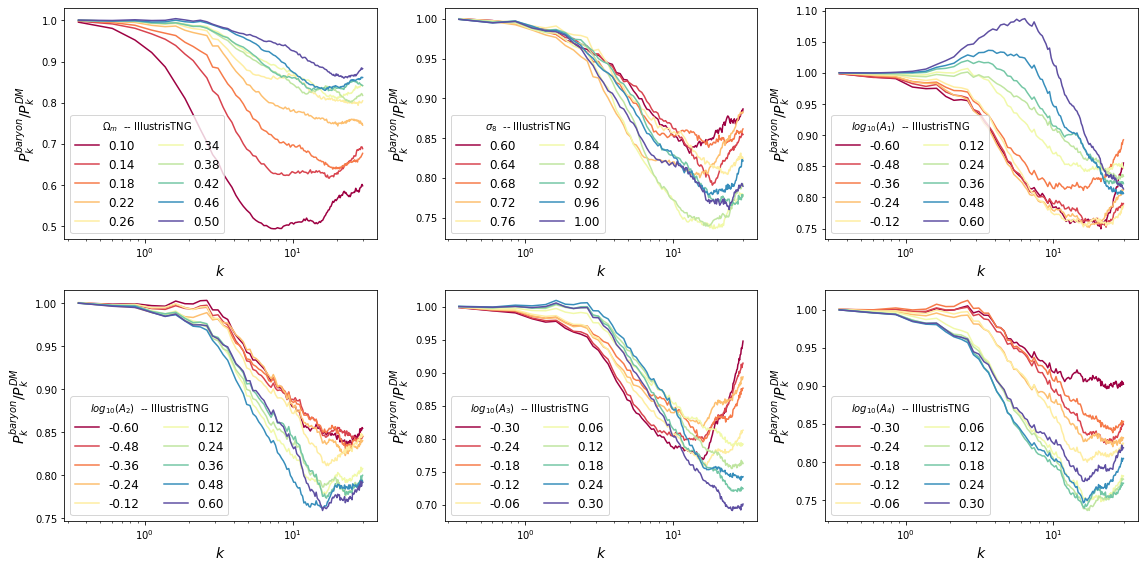

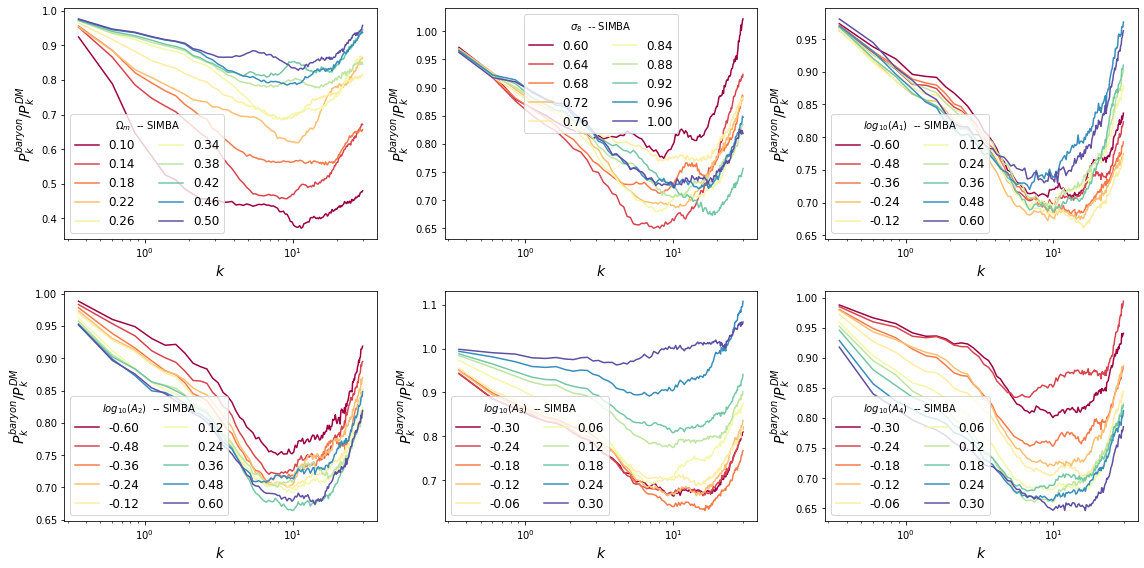

In [72]:
for isim in ['IllustrisTNG', 'SIMBA']:
    ifn = home+'Pk/%s_%s_%s_z=%.2f.npy'%(isim, iPk, iset, iz)
    ifn_DM=home+'Pk/%s_%s_%s_z=%.2f_DM.npy'%(isim, iPk, iset, iz)
    Pk_arr = np.load(ifn)
    Pk_DM_arr = np.load(ifn_DM)

    params = Pk_arr[:, :6]
    r = Pk_arr[:, 6:]/Pk_DM_arr[:, 6:]
    params.shape, Pk_arr.shape

    f, axes=subplots(2, 3, figsize=(16,8))
    for i in range(6): ## number of parameters
        ax=axes.reshape(-1)[i]
        idx = where(params[:,i]!=fidu_params[i])[0] # select the varying one on specific parameter
        j=0
        colors = cmap(linspace(0,1,len(idx)))
        for iidx in idx:
            iparam=params[iidx,i]
            ax.plot(kcut, r[iidx], c=colors[j],label='%.2f'%(iparam))
            j+=1
        ax.legend(title='%s  -- %s'%(labels[i], isim),ncol=2,fontsize=12)
        ax.set_xscale('log')
        ax.set_xlabel('$k$',fontsize=14)
        ax.set_ylabel(r'$P_k^{baryon}/P_k^{DM}$',fontsize=14)
    plt.tight_layout()
    show()